Aquí voy a ver qué salió de la prueba que hice corriendo beersheba con un fichero only de penthesilea de los que me dejó marija

In [11]:
import tables  as tb
import pandas  as pd
import sqlite3 as sql
import numpy   as np

import matplotlib.pyplot    as plt
import matplotlib           as mpl
from   mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io import mcinfo_io as mio
from invisible_cities.io import dst_io    as dio

from next_sparseconvnet.data_io_scripts.plotting_utils import plot_3d_hits

Primero miramos el fichero original de donde salieron los datos...

In [19]:
dir_penth = '/home/mperez/PHD/beersheba_config/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.dst_6206.root.h5'

Información de MC

In [20]:
df_hits_MC = mio.load_mchits_df(dir_penth)
df_part_MC = mio.load_mcparticles_df(dir_penth)

Información de penthesilea (hits)

In [21]:
df_hits_penth = dio.load_dst(dir_penth, 'RECO', 'Events')

In [22]:
nevent = 80

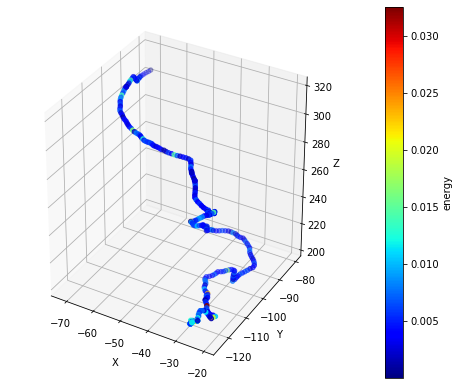

In [23]:
df_hits_MC_event = df_hits_MC.loc[nevent]
plot_3d_hits(df_hits_MC_event)

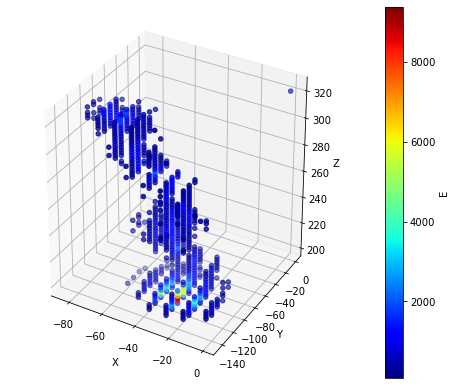

In [24]:
df_hits_penth_event = df_hits_penth.loc[df_hits_penth['event'] == nevent]

plot_3d_hits(df_hits_penth_event, value = 'E', coords = ['X', 'Y', 'Z'])

In [25]:
def plot_3d_hits_double(hits, hits2, value='energy', coords = ['x', 'y', 'z'], cmap = mpl.cm.jet, value2 = 'E', coords2 = ['X', 'Y', 'Z']):
    #Función para hacer plot de distintos hits de un mismo evento superponiéndose
    
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=hits.loc[:, value].min(), vmax=hits.loc[:, value].max())

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(hits.loc[:, value]))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(hits[coords[0]], hits[coords[1]], hits[coords[2]], c=colors, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    axcb2 = fig.add_subplot(gs[0, 18])
    norm2 = mpl.colors.Normalize(vmin=hits2.loc[:, value2].min(), vmax=hits2.loc[:, value2].max())

    m2    = mpl.cm.ScalarMappable(norm=norm2, cmap=cmap)

    colors2 = np.asarray(np.vectorize(m2.to_rgba)(hits2.loc[:, value2]))
    colors2 = np.rollaxis(colors2, 0, 2)

    ax.scatter(hits2[coords2[0]], hits2[coords2[1]], hits2[coords2[2]], c=colors2, marker='o', alpha = 0.1)
    cb2 = mpl.colorbar.ColorbarBase(axcb2, cmap=cmap, norm=norm2, orientation='vertical')
    
    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label (value)

    plt.show()

/home/mperez/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


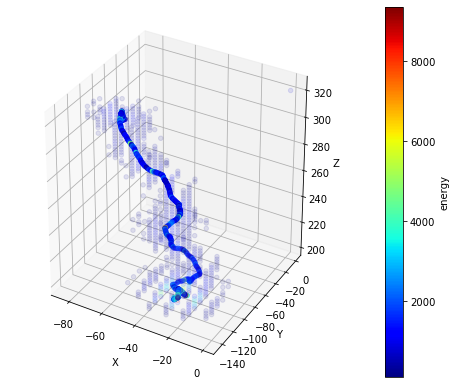

In [26]:
plot_3d_hits_double(df_hits_MC_event, df_hits_penth_event)

Veamos ahora qué salió de correr beersheba...

In [31]:
dir_bersh = '/home/mperez/PHD/beersheba_config/prueba_beersheba.h5'

In [32]:
with tb.open_file(dir_bersh) as h5in:
    print(h5in)

/home/mperez/PHD/beersheba_config/prueba_beersheba.h5 (File) ''
Last modif.: 'Thu Sep 30 13:56:24 2021'
Object Tree: 
/ (RootGroup) ''
/MC (Group) ''
/MC/event_mapping (Table(0,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(0,), shuffle, zlib(4)) ''
/MC/particles (Table(0,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(0,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(0,), shuffle, zlib(4)) 'run info table'



Vale, parece q no hizo absolutamente nada!! Quizás es por el hecho de que el input de beersheba son esmeraldas, como venía sospechando